In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Learning

## action rate

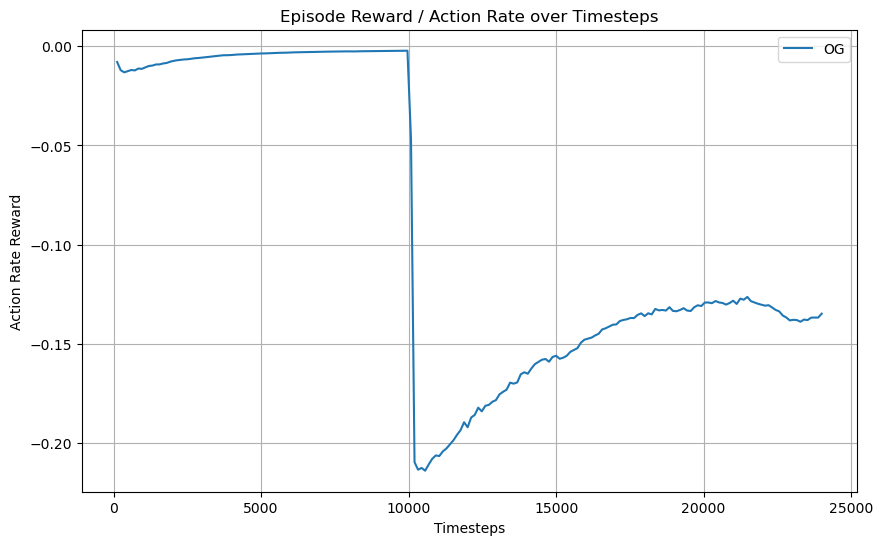

In [13]:

#action rate
# Function to load and plot data from CSV files
def plot_action_rate(file_paths, labels):
    plt.figure(figsize=(10, 6))
    
    for file_path, label in zip(file_paths, labels):
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Assuming columns are named 'Step' and 'Value'
        timesteps = df['Step']
        reward_action_rate = df['Value']
        
        # Plot the data
        plt.plot(timesteps, reward_action_rate, label=label)
    
    # Add labels and title
    plt.xlabel('Timesteps')
    plt.ylabel('Action Rate Reward')
    plt.title('Episode Reward / Action Rate over Timesteps')
    
    # Add legend
    plt.legend()
    
    # Show grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Example usage:
file_paths = [
    'data/rewards/action-rate/skrl_lift_2024-09-13_22-25-30-og-actionrate.csv',
    #'path_to_your/skrl_lift_2024-09-13_20-44-46-torque-best.csv'
]
#labels = ['OG', 'Torque-Best']
labels = ['OG']

# Call the function to plot
plot_action_rate(file_paths, labels)


## average reward

        Model   Step      Value
0    OG Model    120   2.125501
1    OG Model    240   1.034547
2    OG Model    360   0.320464
3    OG Model    480   0.434772
4    OG Model    600   0.910224
..        ...    ...        ...
195  OG Model  23520  43.865108
196  OG Model  23640  44.460709
197  OG Model  23760  44.402061
198  OG Model  23880  44.310970
199  OG Model  24000  44.687328

[200 rows x 3 columns]


C:\Users\alina\AppData\Local\Temp\ipykernel_20468\3498832017.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)


\begin{tabular}{lr}
\toprule
Model & Final Reward \\
\midrule
OG Model & 44.687328 \\
\bottomrule
\end{tabular}



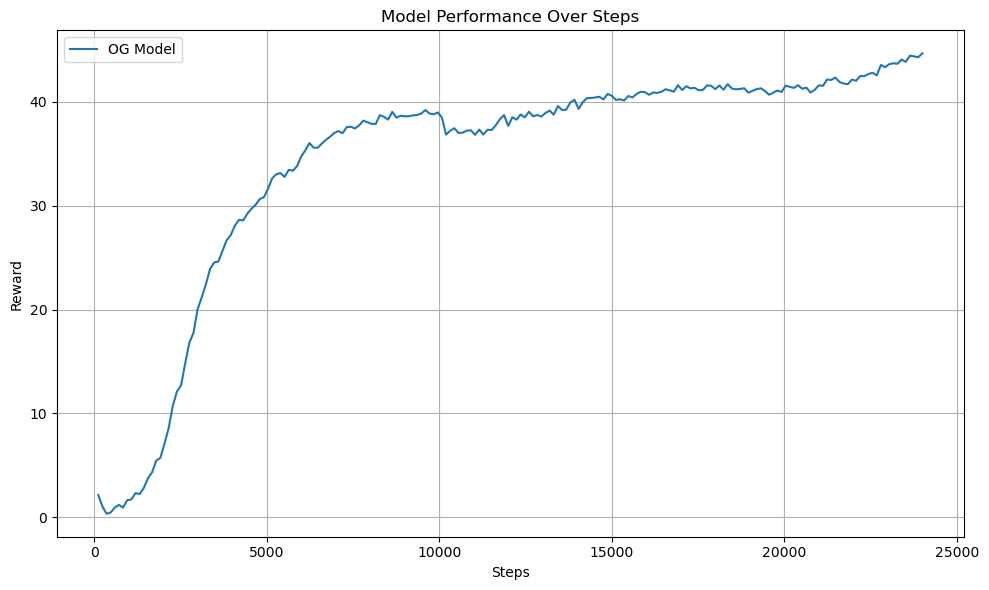

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Example usage:
# Add the CSV file paths and the corresponding model names
file_paths = [
    'data/mean_rew/skrl_lift_2024-09-13_22-25-30-og-totalRewMean.csv',  # Update with actual paths
    #'path_to_your/another_model.csv'  # Add more file paths as needed
]
model_names = [
    'OG Model',  # Model names corresponding to the CSV files
    #'Another Model'
]

# Create an empty DataFrame to store all the data
results_table = pd.DataFrame()

# Process each file and add to the results table
for file_path, model_name in zip(file_paths, model_names):
    results_table = pd.concat([results_table, process_csv(file_path, model_name)], ignore_index=True)

# Display the results table
print(results_table)

# Extract the final reward for each model
final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)

# Create a DataFrame for the LaTeX table
latex_table_df = final_rewards[['Model', 'Value']].rename(columns={'Value': 'Final Reward'})

# Convert the LaTeX table DataFrame to LaTeX format
latex_table = latex_table_df.to_latex(index=False)
print(latex_table)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's data
for model_name in model_names:
    model_data = results_table[results_table['Model'] == model_name]
    plt.plot(model_data['Step'], model_data['Value'], linestyle='-', label=model_name)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Model Performance Over Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## torque

                     Model   Step      Value
0    4 Layers Batch Torque    120  -9.856690
1    4 Layers Batch Torque    240 -13.446279
2    4 Layers Batch Torque    360 -14.663562
3    4 Layers Batch Torque    480 -12.657195
4    4 Layers Batch Torque    600 -11.651456
..                     ...    ...        ...
195  4 Layers Batch Torque  23520  -1.875674
196  4 Layers Batch Torque  23640  -1.909284
197  4 Layers Batch Torque  23760  -1.833970
198  4 Layers Batch Torque  23880  -1.804625
199  4 Layers Batch Torque  24000  -1.744331

[200 rows x 3 columns]


C:\Users\alina\AppData\Local\Temp\ipykernel_20468\3975223262.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)


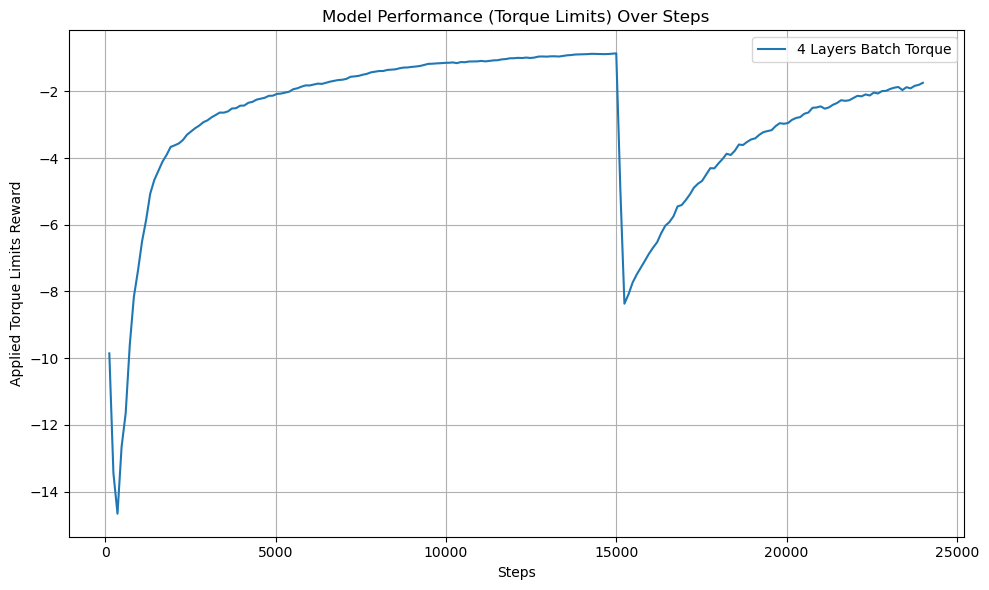

In [15]:
#terque
import pandas as pd
import matplotlib.pyplot as plt

# Function to process a CSV file and return relevant data
def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Example usage:
file_paths = [
    'data/rewards/torque/skrl_lift_2024-09-17_18-38-18-4layers-batch-torque.csv'  # Replace with actual path
]
model_names = [
    '4 Layers Batch Torque'  # Name corresponding to the file
]

# Create an empty DataFrame to store all the data
results_table = pd.DataFrame()

# Process each file and add to the results table
for file_path, model_name in zip(file_paths, model_names):
    results_table = pd.concat([results_table, process_csv(file_path, model_name)], ignore_index=True)

# Display the results table
print(results_table)

# Extract the final reward for each model
final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's data
for model_name in model_names:
    model_data = results_table[results_table['Model'] == model_name]
    plt.plot(model_data['Step'], model_data['Value'], linestyle='-', label=model_name)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Applied Torque Limits Reward')
plt.title('Model Performance (Torque Limits) Over Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## reaching

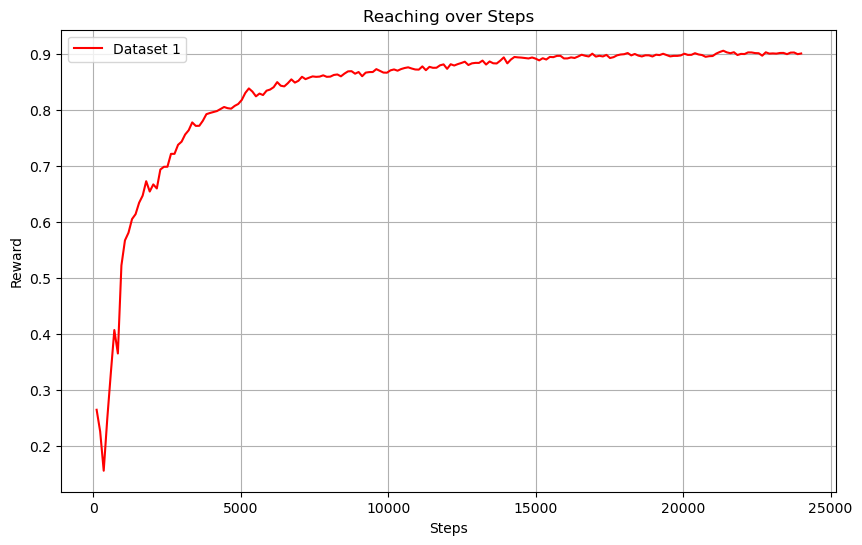

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
data1 = pd.read_csv('data/rewards/reaching/skrl_lift_2024-09-13_22-25-30-og-reaching.csv')

# Plotting function that can handle multiple datasets
def plot_rewards(data, label, color):
    plt.plot(data['Step'], data['Value'], label=label, color=color)

# Create a plot
plt.figure(figsize=(10,6))

# Plot the first line
plot_rewards(data1, label='Dataset 1', color='red')

# You can load another dataset from a different CSV file and plot it similarly:
# Uncomment the next lines to add another CSV file:
# data2 = pd.read_csv('path_to_another_csv.csv')
# plot_rewards(data2, label='Dataset 2', color='blue')

# Adding labels and title
plt.title('Reaching over Steps')
plt.xlabel('Steps')
plt.ylabel('Reward')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## policy standard deviation

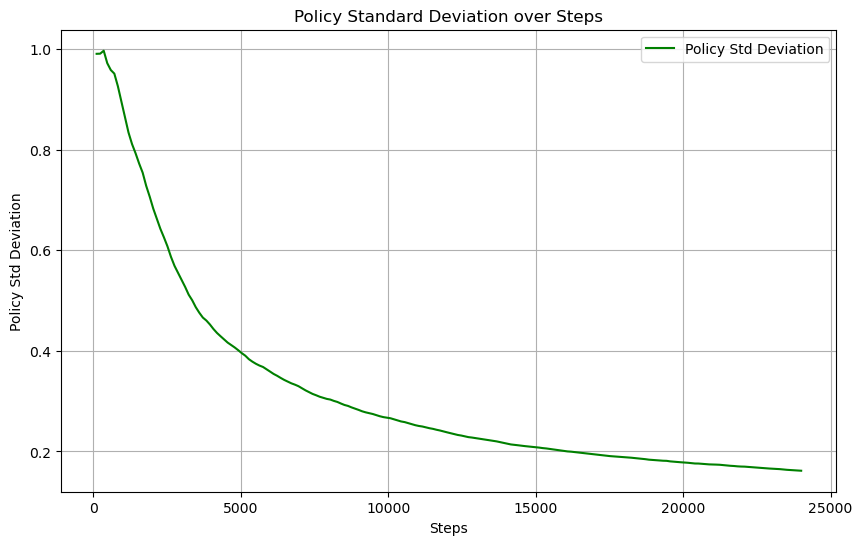

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the policy standard deviation dataset
policy_data = pd.read_csv('data/policy/skrl_lift_2024-09-13_22-25-30-og-policy.csv')

# Plotting function for policy standard deviation
def plot_policy_std(data, label, color):
    plt.plot(data['Step'], data['Value'], label=label, color=color)

# Create the plot for policy standard deviation
plt.figure(figsize=(10,6))

# Plot policy standard deviation data
plot_policy_std(policy_data, label='Policy Std Deviation', color='green')

# Optionally add another dataset for comparison:
# Uncomment the next lines to add another CSV file:
# another_policy_data = pd.read_csv('path_to_another_csv.csv')
# plot_policy_std(another_policy_data, label='Another Policy', color='purple')

# Adding labels and title
plt.title('Policy Standard Deviation over Steps')
plt.xlabel('Steps')
plt.ylabel('Policy Std Deviation')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


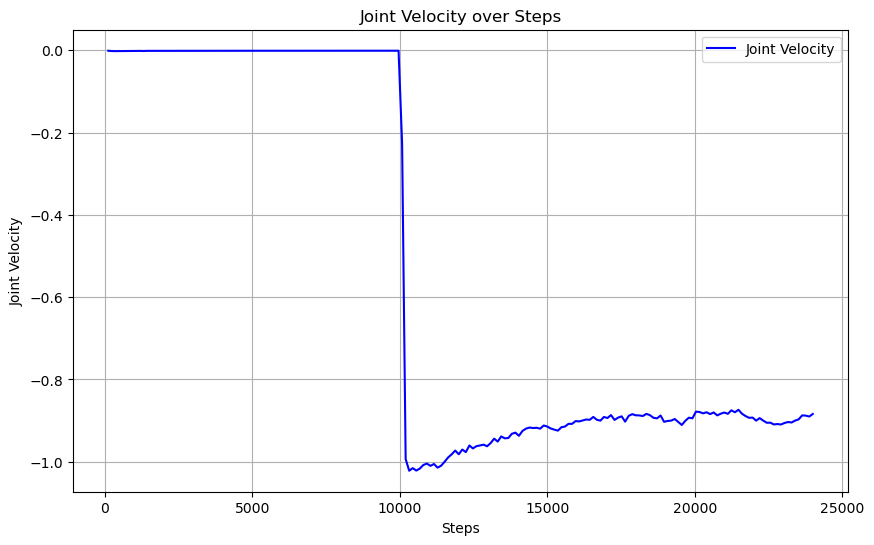

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the joint velocity dataset
joint_velocity_data = pd.read_csv('data/rewards/joint_vel/skrl_lift_2024-09-13_22-25-30-og-Jvel.csv')

# Plotting function for multiple datasets
def plot_velocity(data, label, color):
    plt.plot(data['Step'], data['Value'], label=label, color=color)

# Create the plot for joint velocity
plt.figure(figsize=(10,6))

# Plot joint velocity data
plot_velocity(joint_velocity_data, label='Joint Velocity', color='blue')

# Optionally add another dataset (e.g., joint velocity from a second CSV):
# Uncomment the next lines to add another CSV file:
# another_velocity_data = pd.read_csv('path_to_another_csv.csv')
# plot_velocity(another_velocity_data, label='Another Dataset', color='green')

# Adding labels and title
plt.title('Joint Velocity over Steps')
plt.xlabel('Steps')
plt.ylabel('Joint Velocity')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


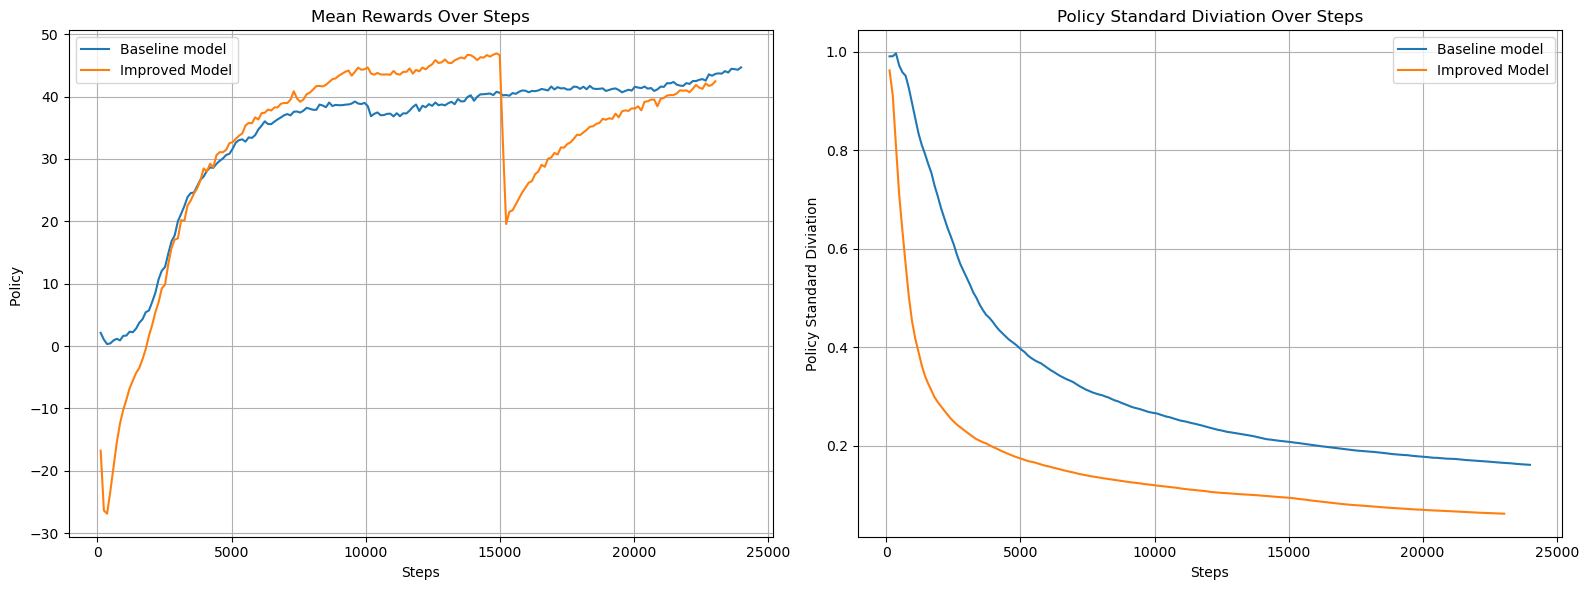

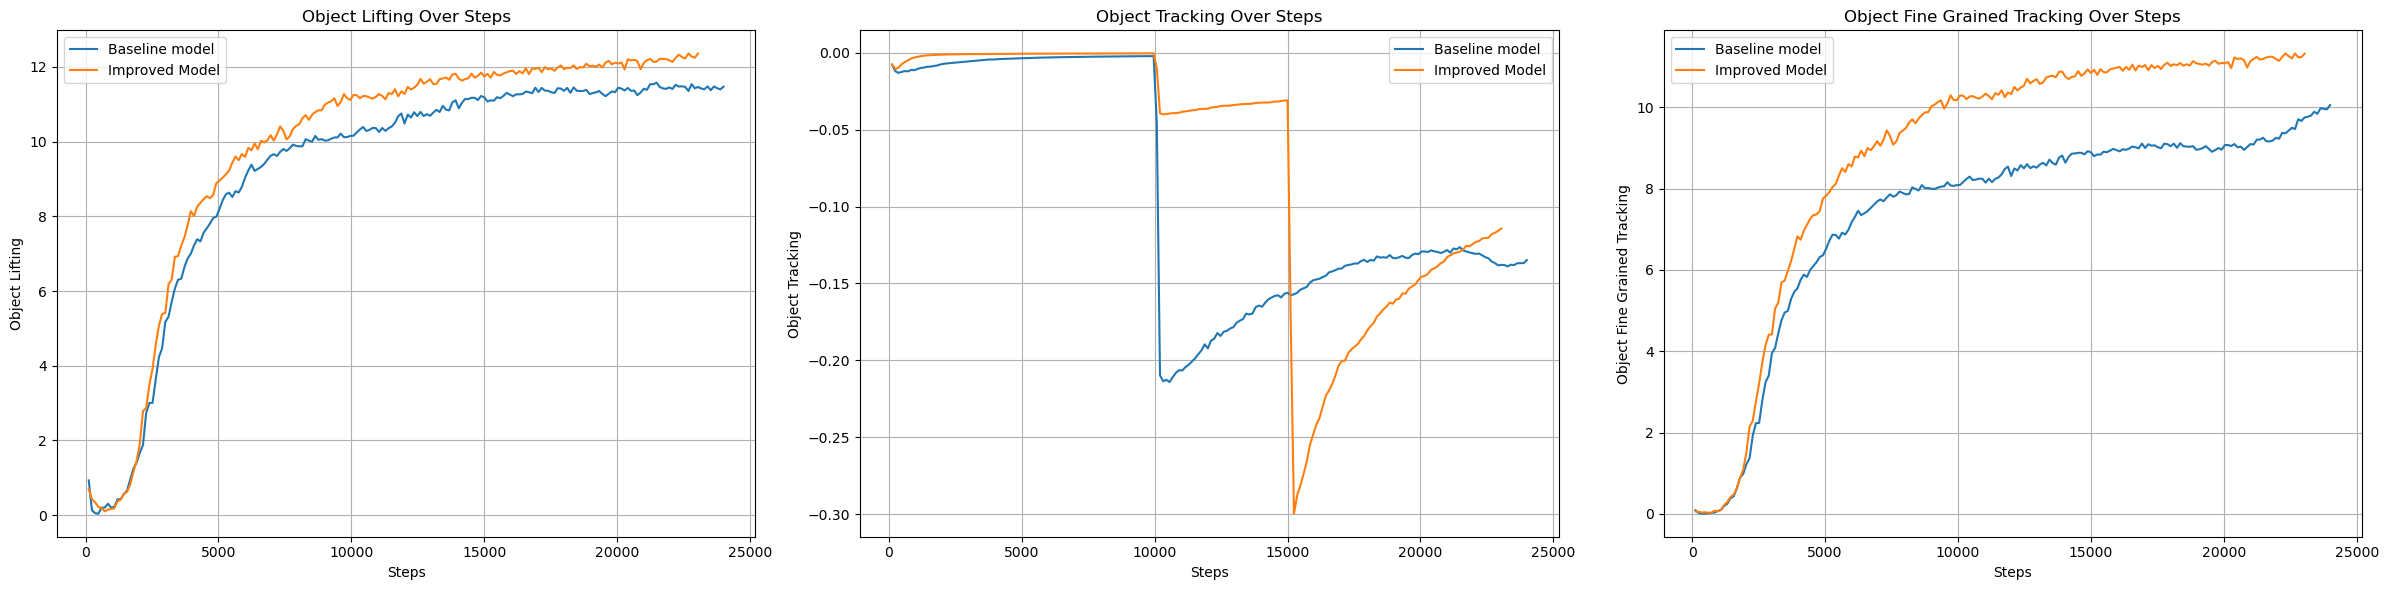

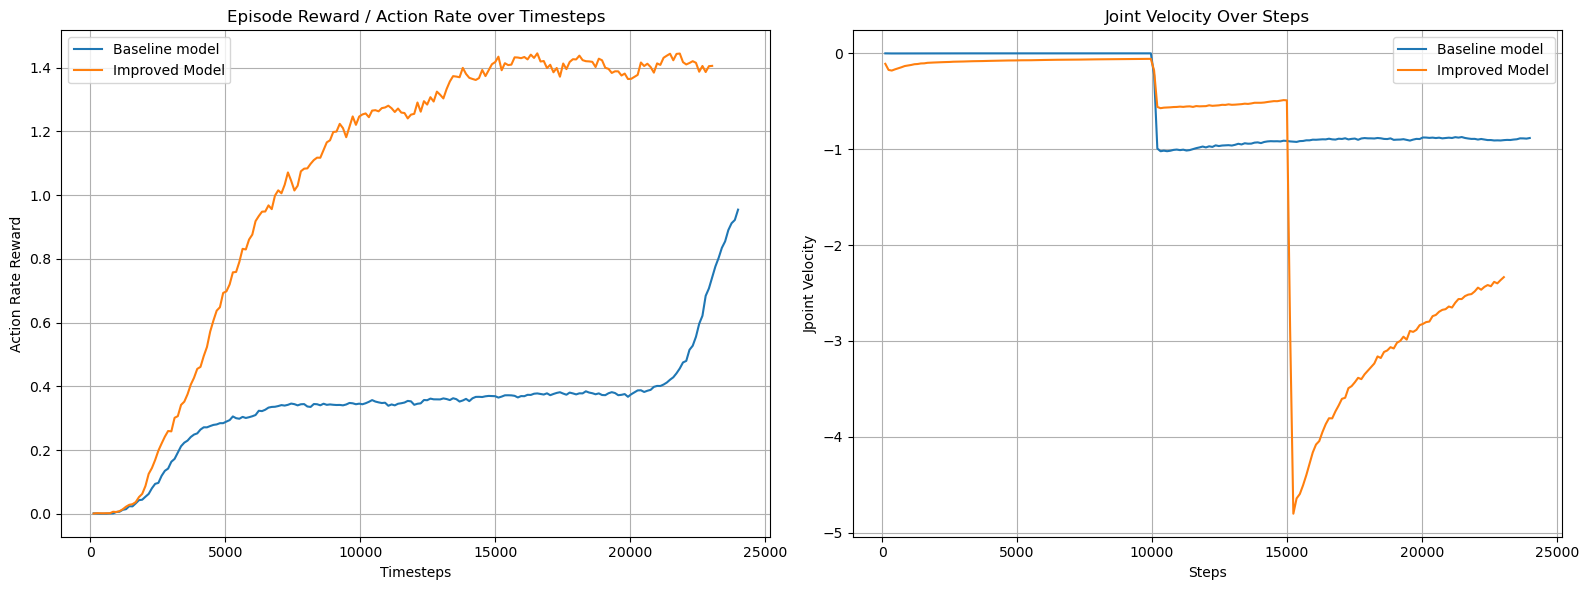

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process CSV and return data
def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Function to plot torque limits reward graph (multiple CSVs can be passed)
def plot_torque_limits(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Applied Torque Limits Reward')
    ax.set_title('Model Performance (Torque Limits)')
    ax.legend()
    ax.grid(True)

# Function to plot another type of graph (multiple CSVs can be passed)
def plot_action_rate(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Action Rate Reward')
    ax.set_title('Episode Reward / Action Rate over Timesteps')
    ax.legend()
    ax.grid(True)
    
def plot_mean_policySTD(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Policy Standard Diviation')
    ax.set_title('Policy Standard Diviation Over Steps')
    ax.legend()
    ax.grid(True)

def plot_mean_Tracking(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Object Tracking')
    ax.set_title('Object Tracking Over Steps')
    ax.legend()
    ax.grid(True)

def plot_mean_FTracking(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Object Fine Grained Tracking')
    ax.set_title('Object Fine Grained Tracking Over Steps')
    ax.legend()
    ax.grid(True)

def plot_mean_JointVelocity(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Jpoint Velocity')
    ax.set_title('Joint Velocity Over Steps')
    ax.legend()
    ax.grid(True)

def plot_mean_rewards(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Policy ')
    ax.set_title('Mean Rewards Over Steps')
    ax.legend()
    ax.grid(True)

def plot_mean_Lifting(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Object Lifting')
    ax.set_title('Object Lifting Over Steps')
    ax.legend()
    ax.grid(True)

def plot_graphs(plot_functions, csv_paths_list, model_names_list):
    # First set of plots: Mean rewards and Policy standard deviation
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    plot_mean_rewards(axes[0], csv_paths_list[0], model_names_list[0])
    plot_mean_policySTD(axes[1], csv_paths_list[1], model_names_list[1])
    plt.tight_layout()
    plt.show()

    # Second set of plots: Lifting, Tracking, and Fine Grained Tracking
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    plot_mean_Lifting(axes[0], csv_paths_list[2], model_names_list[2])
    plot_mean_Tracking(axes[1], csv_paths_list[3], model_names_list[3])
    plot_mean_FTracking(axes[2], csv_paths_list[4], model_names_list[4])
    plt.tight_layout()
    plt.show()

    # Third set of plots: Action rate and Joint velocity
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    plot_action_rate(axes[0], csv_paths_list[5], model_names_list[5])
    plot_mean_JointVelocity(axes[1], csv_paths_list[6], model_names_list[6])
    plt.tight_layout()
    plt.show()





# Example usage:
# Add the CSV file paths and the corresponding model names for each graph
csv_paths_list = [
    ['data/mean_rew/skrl_lift_2024-09-13_22-25-30-og-totalRewMean.csv', 'data/mean_rew/skrl_lift_2024-09-19_21-52-33-best4by4.csv' ],  # Multiple CSVs for torque limits graph
    ['data/policy/skrl_lift_2024-09-13_22-25-30-og-policy.csv', 'data/policy/skrl_lift_2024-09-19_21-52-33-best4by4.csv' ],# Multiple CSVs for another graph
    ['data/rewards/lifting/skrl_lift_2024-09-13_22-25-30-og-lifting.csv', 'data/rewards/lifting/skrl_lift_2024-09-19_21-52-33-best4by4.csv' ],
    ['data/rewards/action-rate/skrl_lift_2024-09-13_22-25-30-og-actionrate.csv', 'data/rewards/action-rate/skrl_lift_2024-09-19_21-52-33-best4by4.csv' ],
    ['data/rewards/tracking/skrl_lift_2024-09-13_22-25-30-og-tracking.csv', 'data/rewards/tracking/skrl_lift_2024-09-19_21-52-33-best4by4.csv' ],
    ['data/rewards/fine_tracking/skrl_lift_2024-09-13_22-25-30-og-trackingFine.csv', 'data/rewards/fine_tracking/skrl_lift_2024-09-19_21-52-33-best4by4.csv' ],
    ['data/rewards/joint_vel/skrl_lift_2024-09-13_22-25-30-og-Jvel.csv', 'data/rewards/joint_vel/skrl_lift_2024-09-19_21-52-33-best4by4.csv' ],
]
model_names_list = [
    ['Baseline model', 'Improved Model'],  # Model names for the torque limits graph
    ['Baseline model', 'Improved Model'],
    ['Baseline model', 'Improved Model'],
    ['Baseline model', 'Improved Model'],
    ['Baseline model', 'Improved Model'],
    ['Baseline model', 'Improved Model'],
    ['Baseline model', 'Improved Model']
]

# Define the plotting functions corresponding to each graph
plot_functions = [
    plot_mean_rewards,
    plot_mean_policySTD,
    plot_mean_Lifting,
    plot_action_rate,
    plot_mean_Tracking,
    plot_mean_FTracking,
    plot_mean_JointVelocity
]

# Call the function to plot the graphs
plot_graphs(plot_functions, csv_paths_list, model_names_list)


# Baseline

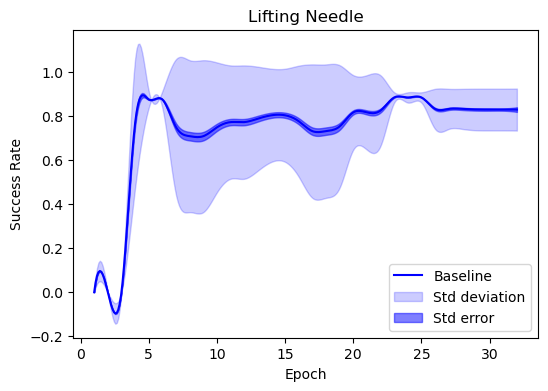

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Load the CSV file
file_path_og = 'data/inference/performance_log_og2.csv'  # Change this to your file path
df = pd.read_csv(file_path_og)

# Ensure 'Success rate' contains only numeric values
df['Success rate'] = pd.to_numeric(df['Success rate'], errors='coerce')

# Drop rows where 'Success rate' is NaN or invalid
df_clean = df.dropna(subset=['Success rate'])

# Group by epoch and calculate mean, std, and standard error
grouped_clean = df_clean.groupby('Epoch')['Success rate'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Epoch'].value_counts().sort_index())

# grouped_clean = df_clean.groupby('Episode')['Success rate'].agg(['mean', 'std'])
# grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Episode'].value_counts().sort_index())

# Prepare values for plotting
epochs = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Interpolation for smoother lines
epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(epochs_smooth, mean_smooth, label='Baseline', color='blue')

# Fill between for std (light shaded area)
plt.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color='blue', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color='blue', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Success Rate')
plt.title('Lifting Needle')
plt.legend(loc='best')

# Show the plot
plt.show()


# Improved model

Episode
1      990
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: count, dtype: int64


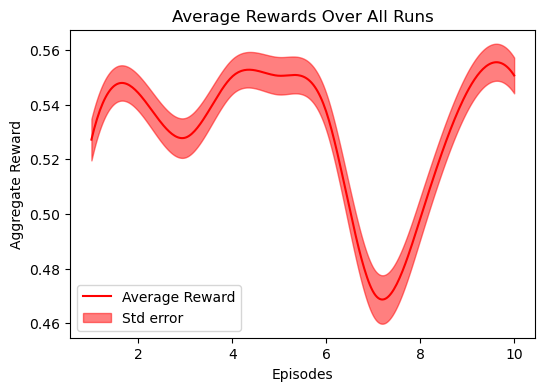

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Load the CSV file
file_path = 'data/inference/performance_log_best2.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure 'Reward' contains only numeric values
#df['Reward'] = pd.to_numeric(df['Reward'], errors='coerce')

# Drop rows where 'Reward' is NaN or invalid
#df_clean = df.dropna(subset=['Reward'])
print(df['Episode'].value_counts().sort_index())

# Group by episode and calculate mean, std, and standard error
grouped_clean = df.groupby('Episode')['Reward'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

# Prepare values for plotting
episodes = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Interpolation for smoother lines
episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(episodes_smooth, mean_smooth, label='Average Reward', color='red')

# Fill between for std (light shaded area)
#plt.fill_between(episodes_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color='red', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color='red', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Aggregate Reward')
plt.title('Average Rewards Over All Runs')
plt.legend(loc='best')

# Show the plot
plt.show()

Episode
1     780
2    1500
3    1500
4    1500
5    1500
6    1500
7    1032
Name: count, dtype: int64


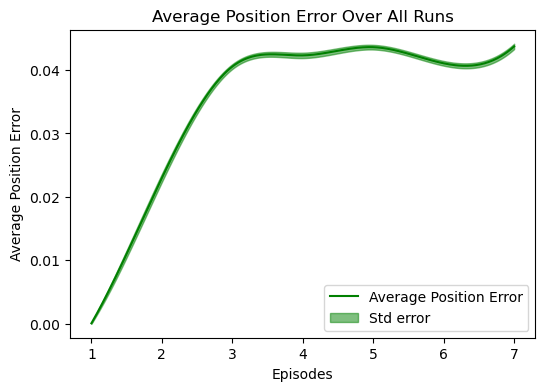

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Load the CSV file
file_path = 'data/inference/best.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure 'Reward' contains only numeric values
df['Metrics/object_pose/position_error'] = pd.to_numeric(df['Metrics/object_pose/position_error'], errors='coerce')

# Drop rows where 'Reward' is NaN or invalid
df_clean = df.dropna(subset=['Metrics/object_pose/position_error'])
print(df_clean['Episode'].value_counts().sort_index())

# Group by episode and calculate mean, std, and standard error
grouped_clean = df_clean.groupby('Episode')['Metrics/object_pose/position_error'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Episode'].value_counts().sort_index())

# Prepare values for plotting
episodes = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Interpolation for smoother lines
episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(episodes_smooth, mean_smooth, label='Average Position Error', color='green')

# Fill between for std (light shaded area)
#plt.fill_between(episodes_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color='red', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color='green', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Average Position Error')
plt.title('Average Position Error Over All Runs')
plt.legend(loc='best')

# Show the plot
plt.show()

Episode
1     780
2    1500
3    1500
4    1500
5    1500
6    1500
7    1032
Name: count, dtype: int64


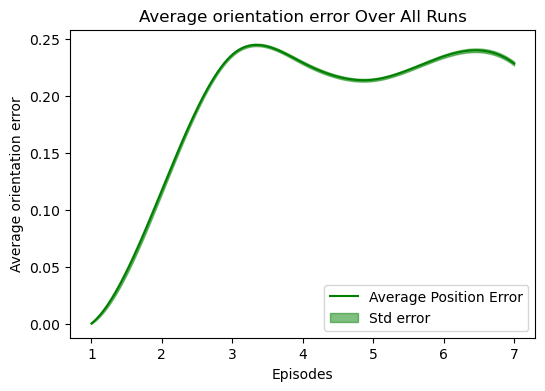

In [24]:
# Load the CSV file
file_path = 'data/inference/best.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure 'Reward' contains only numeric values
df['Metrics/object_pose/orientation_error'] = pd.to_numeric(df['Metrics/object_pose/orientation_error'], errors='coerce')

# Drop rows where 'Reward' is NaN or invalid
df_clean = df.dropna(subset=['Metrics/object_pose/position_error'])
print(df_clean['Episode'].value_counts().sort_index())

# Group by episode and calculate mean, std, and standard error
grouped_clean = df_clean.groupby('Episode')['Metrics/object_pose/orientation_error'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Episode'].value_counts().sort_index())

# Prepare values for plotting
episodes = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Interpolation for smoother lines
episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(episodes_smooth, mean_smooth, label='Average Position Error', color='green')

# Fill between for std (light shaded area)
#plt.fill_between(episodes_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color='red', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color='green', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Average orientation error')
plt.title('Average orientation error Over All Runs')
plt.legend(loc='best')

# Show the plot
plt.show()

Episode
1      990
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: count, dtype: int64
Episode
1      990
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: count, dtype: int64


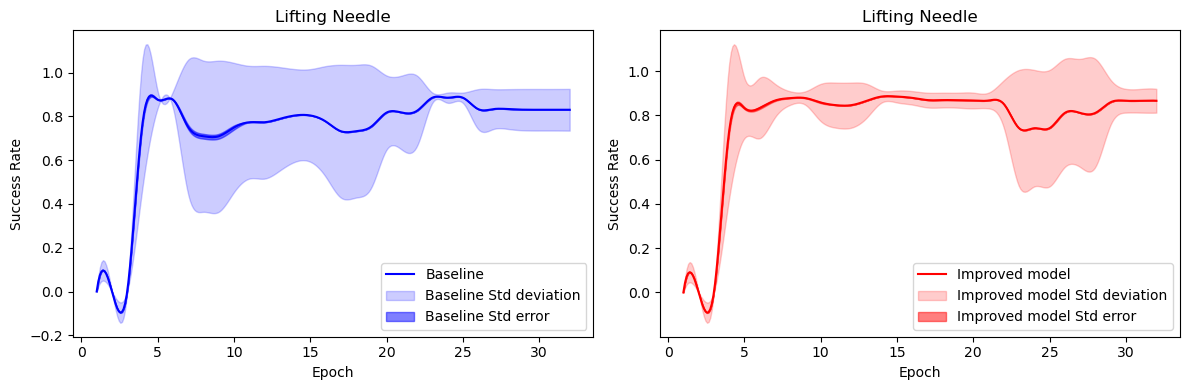

In [20]:

#file_path_best = 'data/inference/performance_log_best.csv'  # Change this to your second file path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Function to process and plot data
def process_and_plot(file_path, ax, label, color):
    df = pd.read_csv(file_path)

    # Ensure 'Success rate' contains only numeric values
    df['Success rate'] = pd.to_numeric(df['Success rate'], errors='coerce')

    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Epoch')['Success rate'].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())
    print(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    epochs = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
    mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
    std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
    stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

    # Plot the graph
    ax.plot(epochs_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Success Rate')
    ax.set_title('Lifting Needle')
    ax.legend(loc='best')

# List of file paths and labels
datasets = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue'),
    ('data/inference/performance_log_best2.csv', 'Improved model', 'red')
]

# Create subplots
fig, axs = plt.subplots(1, len(datasets), figsize=(6 * len(datasets), 4))

# Process and plot each dataset
for i, (file_path, label, color) in enumerate(datasets):
    process_and_plot(file_path, axs[i], label, color)

# Show the plot
plt.tight_layout()
plt.show()


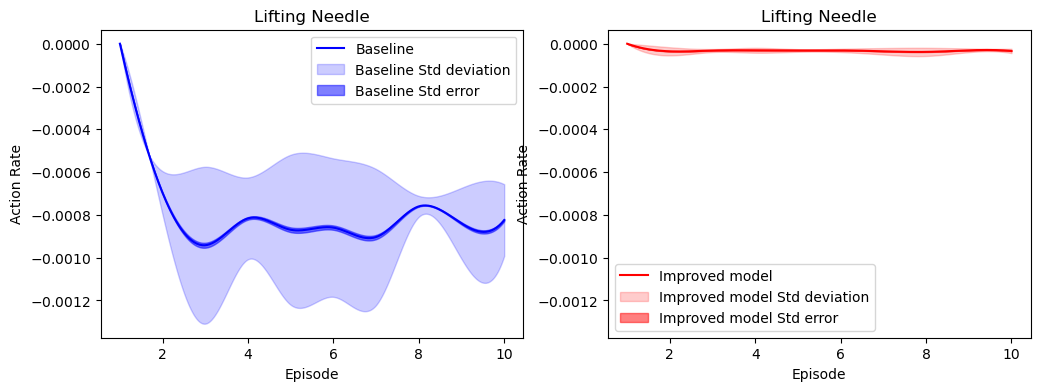

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import ScalarFormatter

# Function to process and plot data
def process_and_plot(file_path, ax, label, color):
    df = pd.read_csv(file_path, dtype={'action_rate': float})

    # Ensure 'action_rate' contains only numeric values
    df['action_rate'] = pd.to_numeric(df['action_rate'], errors='coerce')


    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')['action_rate'].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    epochs = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
    mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
    std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
    stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

    # Plot the graph
    ax.plot(epochs_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Action Rate')
    ax.set_title('Lifting Needle')
    ax.legend(loc='best')

    # Force display of actual numbers instead of scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

# List of file paths and labels
datasets = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue'),
    ('data/inference/performance_log_best2.csv', 'Improved model', 'red')
]

# Create subplots
fig, axs = plt.subplots(1, len(datasets), figsize=(6 * len(datasets), 4))

# Process and plot each dataset
for i, (file_path, label, color) in enumerate(datasets):
    process_and_plot(file_path, axs[i], label, color)

# Ensure the y-axis scale is the same on both graphs
y_min = min(ax.get_ylim()[0] for ax in axs)
y_max = max(ax.get_ylim()[1] for ax in axs)
for ax in axs:
    ax.set_ylim(y_min, y_max)

plt.show()

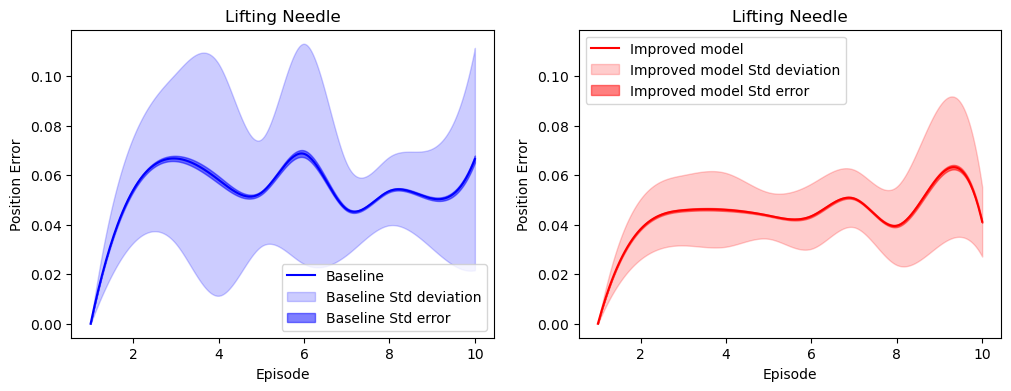

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import ScalarFormatter

# Function to process and plot data
def process_and_plot(file_path, ax, label, color):
    df = pd.read_csv(file_path, dtype={'position_error': float})

    # Ensure 'action_rate' contains only numeric values
    df['position_error'] = pd.to_numeric(df['position_error'], errors='coerce')

    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')['position_error'].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    epochs = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
    mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
    std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
    stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

    # Plot the graph
    ax.plot(epochs_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Position Error')
    ax.set_title('Lifting Needle')
    ax.legend(loc='best')

    # Force display of actual numbers instead of scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

# List of file paths and labels
datasets = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue'),
    ('data/inference/performance_log_best2.csv', 'Improved model', 'red')
]

# Create subplots
fig, axs = plt.subplots(1, len(datasets), figsize=(6 * len(datasets), 4))

# Process and plot each dataset
for i, (file_path, label, color) in enumerate(datasets):
    process_and_plot(file_path, axs[i], label, color)

# Ensure the y-axis scale is the same on both graphs
y_min = min(ax.get_ylim()[0] for ax in axs)
y_max = max(ax.get_ylim()[1] for ax in axs)
for ax in axs:
    ax.set_ylim(y_min, y_max)

plt.show()

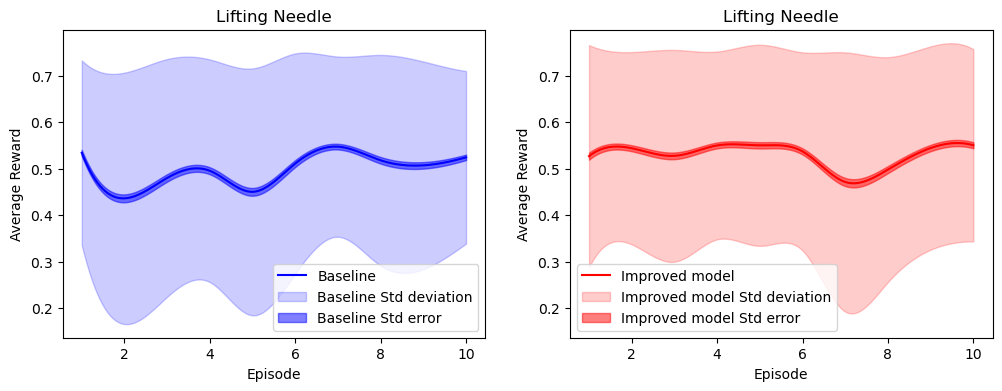

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import ScalarFormatter

# Function to process and plot data
def process_and_plot(file_path, ax, label, color):
    df = pd.read_csv(file_path, dtype={'Reward': float})

    # Ensure 'action_rate' contains only numeric values
    df['Reward'] = pd.to_numeric(df['Reward'], errors='coerce')


    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')['Reward'].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    epochs = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
    mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
    std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
    stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

    # Plot the graph
    ax.plot(epochs_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Average Reward')
    ax.set_title('Lifting Needle')
    ax.legend(loc='best')

    # Force display of actual numbers instead of scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

# List of file paths and labels
datasets = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue'),
    ('data/inference/performance_log_best2.csv', 'Improved model', 'red')
]

# Create subplots
fig, axs = plt.subplots(1, len(datasets), figsize=(6 * len(datasets), 4))

# Process and plot each dataset
for i, (file_path, label, color) in enumerate(datasets):
    process_and_plot(file_path, axs[i], label, color)

# Ensure the y-axis scale is the same on both graphs
y_min = min(ax.get_ylim()[0] for ax in axs)
y_max = max(ax.get_ylim()[1] for ax in axs)
for ax in axs:
    ax.set_ylim(y_min, y_max)

plt.show()

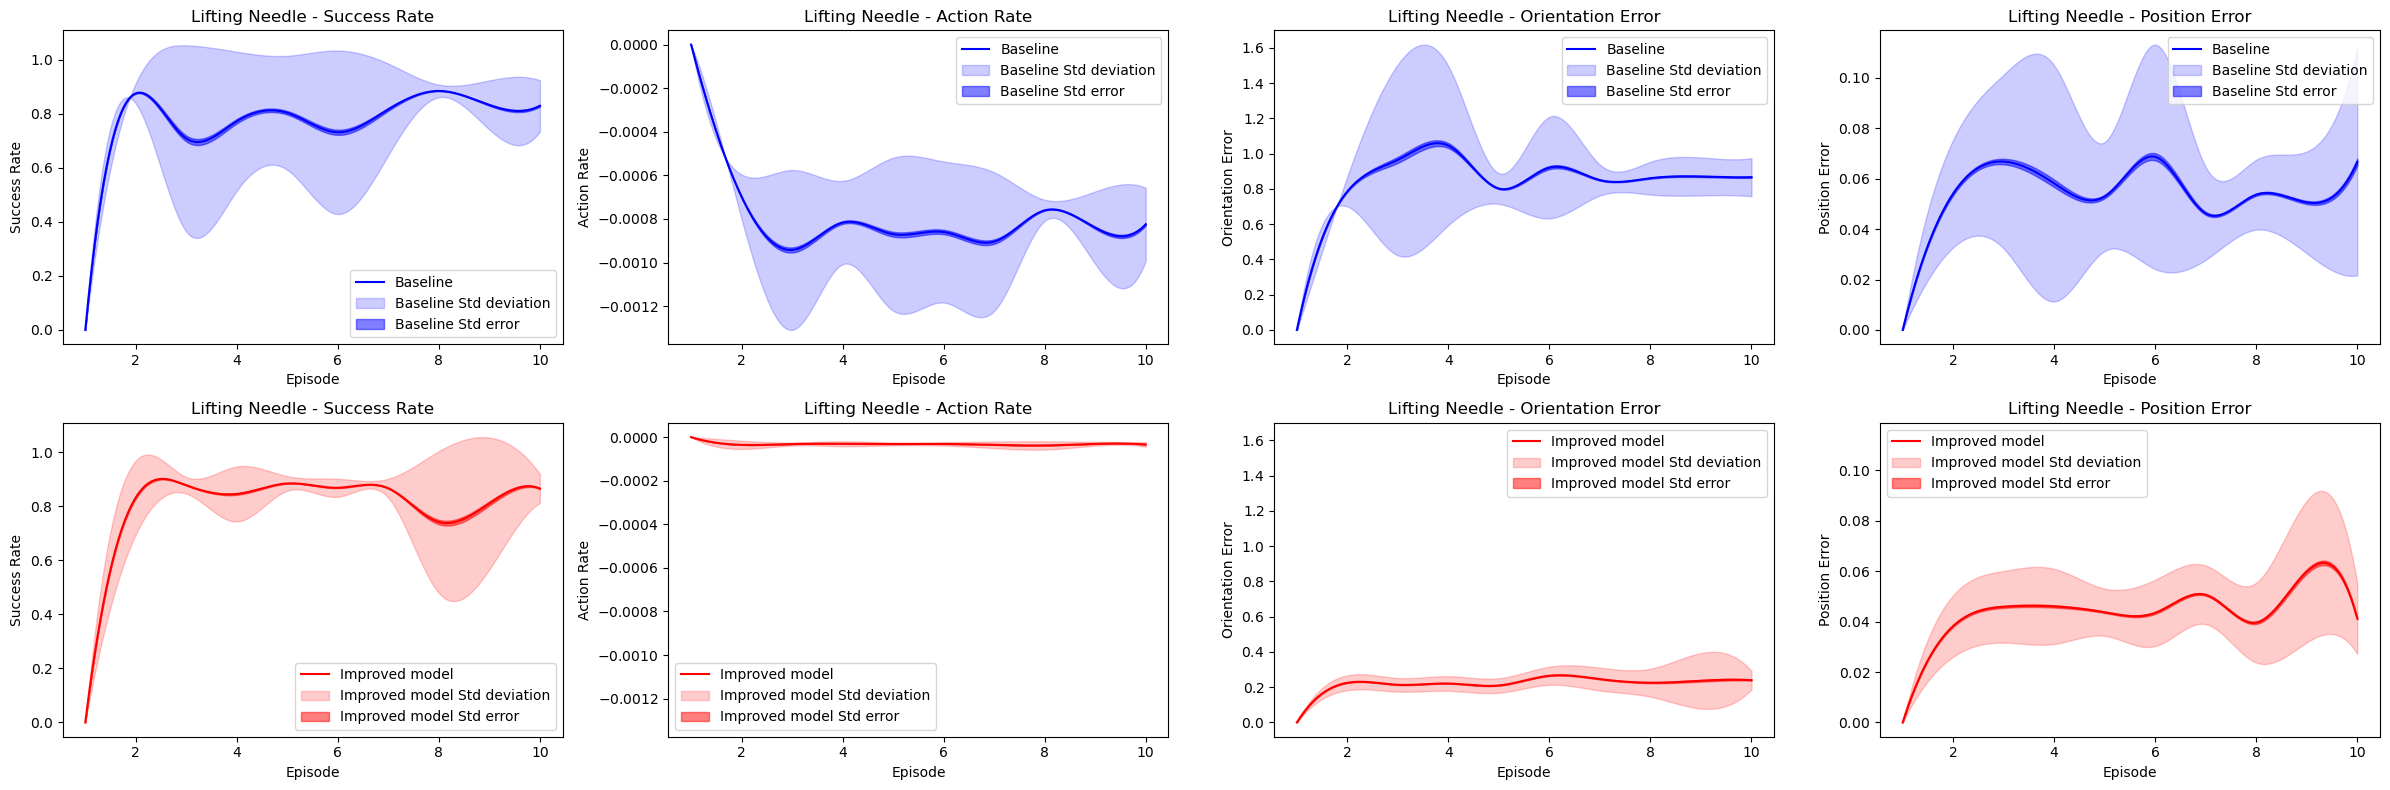

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import ScalarFormatter

# Function to process and plot data
def process_and_plot(file_path, ax, label, color, column_name):
    df = pd.read_csv(file_path, dtype={column_name: float})

    # Ensure the column contains only numeric values
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Drop rows where 'Epoch' is 32
    df = df[df['Episode'] != 32]

    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')[column_name].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    epochs = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
    mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
    std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
    stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

    # Plot the graph
    ax.plot(epochs_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Episode')
    ax.set_ylabel(column_name.replace('_', ' ').title())
    ax.set_title(f'Lifting Needle - {column_name.replace("_", " ").title()}')
    ax.legend(loc='best')

    # Force display of actual numbers instead of scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

# List of file paths, labels, and colors
datasets = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue'),
    ('data/inference/performance_log_best2.csv', 'Improved model', 'red')
]

# List of columns to plot
columns = ['Success rate', 'action_rate', 'orientation_error','position_error', ]

# Create subplots in a 2x4 grid
fig, axs = plt.subplots(2, len(columns), figsize=(6 * len(columns), 8))

# Process and plot each dataset for each column
for i, column_name in enumerate(columns):
    for j, (file_path, label, color) in enumerate(datasets):
        process_and_plot(file_path, axs[j, i], label, color, column_name)

# Ensure the y-axis scale is the same on all graphs for each metric
for i in range(len(columns)):
    y_min = min(axs[j, i].get_ylim()[0] for j in range(len(datasets)))
    y_max = max(axs[j, i].get_ylim()[1] for j in range(len(datasets)))
    for j in range(len(datasets)):
        axs[j, i].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()